## 218 - K Index

[Youtube](https://www.youtube.com/watch?v=L18XOChMJaw)

### K-Index

<br>

<font size="3">
$$K = (T_{850} - T_{500}) + D_{850} - (T_{700} - D_{700})$$
</font>

In [1]:
from datetime import datetime

In [2]:
date = datetime(2021, 12, 11, 0)
station = 'BMX'

In [3]:
from metpy.units import units, pandas_dataframe_to_unit_arrays
import metpy.calc as mpcalc
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [4]:
df = WyomingUpperAir.request_data(date, station)

In [5]:
df.head()

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,994.0,178,21.2,19.0,150.0,5.0,-2.500000,4.330127,BMX,72230,2021-12-11,33.16,-86.76,178.0,38.09
1,955.0,521,19.6,19.2,178.0,22.0,-0.767789,21.986598,BMX,72230,2021-12-11,33.16,-86.76,178.0,38.09
2,925.0,793,18.4,17.7,200.0,36.0,12.312725,33.828934,BMX,72230,2021-12-11,33.16,-86.76,178.0,38.09
3,850.0,1515,15.4,12.0,220.0,35.0,22.497566,26.811556,BMX,72230,2021-12-11,33.16,-86.76,178.0,38.09
4,799.0,2037,11.8,7.8,231.0,35.0,27.200109,22.026214,BMX,72230,2021-12-11,33.16,-86.76,178.0,38.09


In [6]:
df = pandas_dataframe_to_unit_arrays(df)
mpcalc.k_index(df['pressure'], df['temperature'], df['dewpoint'])

26.299999999999997 <Unit('degree_Celsius')>

In [7]:
def get_k_index(date, station):
    df = WyomingUpperAir.request_data(date, station)
    df = pandas_dataframe_to_unit_arrays(df)
    return mpcalc.k_index(df['pressure'], df['temperature'], df['dewpoint'])

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
dates = pd.date_range(start = datetime(2021, 12, 1, 0), end = datetime(2021, 12, 15, 12), freq = '12H')

In [11]:
k_index_values = [get_k_index(date, station) for date in dates]

Text(0, 0.5, 'K-Index')

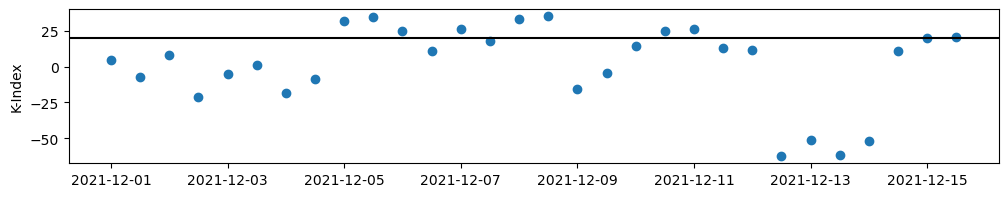

In [12]:
fig, ax = plt.subplots(figsize = (12,2))
ax.scatter(dates, k_index_values)
ax.axhline(y = 20, color = 'k')
ax.set_ylabel('K-Index')